# 220456586_ST2195_Python_Part1

## Import Libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Answering the Questions:

### (a)

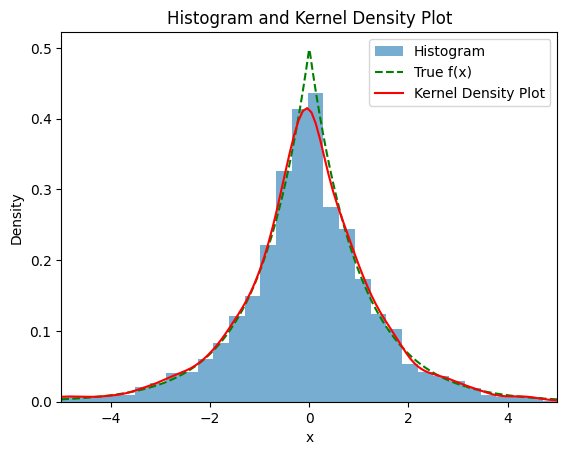

Sample Mean:  -0.07241976579032496
Sample Standard Deviation:  1.4900913077632247


In [2]:
# Define f(x)
def f(x):
    return 0.5 * np.exp(-np.abs(x))

# Set up parameters
x0, N, s = 0, 10000, 1

# Initialise variables
x = np.zeros(N)
x[0] = np.random.normal(0, 1)

# Implement the Random walk Metropolis algorithm
for i in range(1, N):
    # Simulate a proposal from a normal distribution
    y = np.random.normal(x[i-1], s)
    
    # Compute the ratio
    ratio = (f(y)/f(x[i-1]))
    
    # Generate a uniform random number
    u = np.random.uniform()
    
    # Check if the proposal is accepted
    if np.log(u) < np.log(ratio):
        x[i] = y
    else:
        x[i] = x[i-1]
        
# Create the figure and axes
fig, ax = plt.subplots()

# Plot Histogram
ax.hist(x, 50, density=True, label="Histogram", alpha=0.6)

# Plot Theoretical f(x)
x_vals = np.linspace(-5, 5, 1000)
ax.plot(x_vals, f(x_vals), "g--", label="True f(x)")

# Plot Kernel Density Plot
sns.kdeplot(x, color='red', label="Kernel Density Plot")

# Set x limits
ax.set_xlim(-5, 5)

# Set labels
ax.set_xlabel("x")
ax.set_ylabel("Density")

# Set title
ax.set_title("Histogram and Kernel Density Plot")

# Add legend
plt.legend()

# Show the plot
plt.show()

# Display statistics
print("Sample Mean: ", np.mean(x))
print("Sample Standard Deviation: ", np.std(x))

### (b)

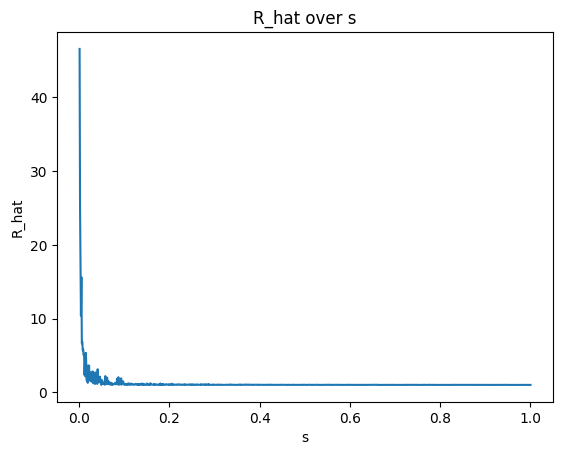

R_hat for s = 0.001: 62.065729129572794
As s values increases, R_hat comes close to 1, for example R_hat for s = 1: 1.0020065222514083


In [11]:
# Set parameters
N = 2000
J = 4
s_values = np.linspace(0.001, 1, 1000)

# Function to implement random walk Metropolis algorithm and calculate chains
def metropolis_algorithm(N, s, J):
    chains = np.zeros((N, J))

    for j in range(J):
        # Initialise variables
        x = np.zeros(N)
        x[0] = np.random.normal(0, 1) 
        for i in range(1, N):
            y = np.random.normal(x[i-1], s)
            ratio = f(y) / f(x[i-1])
            u = np.random.uniform()
            if np.log(u) < np.log(ratio):
                x[i] = y
            else:
                x[i] = x[i-1]
        chains[:, j] = x
        
    return chains

# Function to calculate R_hat
def calculate_R_hat(chains):
    # Compute Mj and Vj for each chain
    Mj_values = np.mean(chains, axis=0)
    Vj_values = np.mean((chains - np.mean(chains, axis=0))**2, axis=0)

    # Compute the overall within sample variance W
    W = np.mean(Vj_values)
    
    # Compute the overall sample mean M
    M = np.mean(Mj_values)
   
    # Compute the between sample variance B
    B = np.mean((Mj_values - M)**2)
    
    # Compute R_hat
    R_hat = np.sqrt((B + W) / W)
    
    return R_hat
    
# Calculate R_hat for different s values    
R_hat_values = np.zeros_like(s_values)
for i, s in enumerate(s_values):
    chains = metropolis_algorithm(N, s, J)
    R_hat_values[i] = calculate_R_hat(chains)
    
# Plot R_hat values
plt.plot(s_values, R_hat_values)
plt.xlabel('s')
plt.ylabel('R_hat')
plt.title('R_hat over s')
plt.show()

# Display statistics
s = 0.001
chains = metropolis_algorithm(N, s, J)
R_hat = calculate_R_hat(chains)
print("R_hat for s = {}: {}".format(s, R_hat))

# Display statistics for s = 1, to show convergence
s = 1
chains = metropolis_algorithm(N, s, J)
R_hat = calculate_R_hat(chains)
print("As s values increases, R_hat comes close to 1, for example R_hat for s = {}: {}".format(s, R_hat))